##  A Model for Tear Film Thinning with Osmolarity and Fluorescein

Braun, Richard J., et al. "A model for tear film thinning with osmolarity and fluorescein." Investigative ophthalmology & visual science 55.2 (2014): 1133-1142.

In this revised code, all quantities (h,c,f,I) are given as output of solveTF. Send them as arguments to the plotting functions. I also changed all the plot functions to contain an axes argument so that I can use subplots as needed. 

Before calling the functions, you must create a figure and pass the axes position to the funtions - this will place the figures in the subplots.
For example:

fig, ax = plt.subplots(1,2)   
intensity_plot_dim(time_dim, thickness, phi, f0, I_0, d,ax[0])    
intensity_plot_dim(time_dim, thickness, phi, f0, I_0, d,ax[1])     

will create two plots of intensity side by side. This:   

fig, ax = plt.subplots()   
intensity_plot_dim(time_dim, thickness, phi, f0, I_0, d,ax)  
 
will create a single plot of intensity.


In [48]:
#@title
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# Calculates the fluorescent intensity
def intensity(thickness, phi, f0, I_0):
  # thickness is a len(d)xt_nsamples matrix, phi is an array, f0 is a number, I_0 is a number
  I = np.zeros((len(thickness),len(t_space)))
  for i in range(len(thickness)):
    I[i,:] = I_0*(1-np.exp(-np.multiply(phi[i],f0)))/(1+np.square(np.divide(f0,thickness[i,:])))
  return I;

def solveTF(t_begin, t_end, t_nsamples, t_space, h_init, Pc, d, f0): 
  thickness = np.zeros((len(d),t_nsamples))
  for i in range(len(d)):
    h = d[i]
    heq = 0.25/h
    #ode_fn = lambda t, h: - (1 - (heq/h)**3) + Pc*(1/h - 1)
    method = 'RK45' #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
    num_sol = solve_ivp(ode_fn(heq), [t_begin, t_end], [h_init], method=method, dense_output=True)
    thickness[i,:] = num_sol.sol(t_space)

  return thickness, 1/thickness, f0/thickness, intensity(thickness, phi, f0, I_0);

# Calulates the RHS of the ode - depends on value of h_eq
def ode_fn(heq):
  return lambda t, h : - (1 - (heq/h)**3) + Pc*(1/h - 1);
  #return lambda t, h : - (1) + Pc*(1/h - 1);

# Plots all solutions for thickness
def thickness_plot(t_mat, thickness, d, ax): 
  ax.plot(t_mat.T, thickness.T, '--', linewidth=2)
  ax.set_title('thickness')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$')
  ax.set_ylabel('$h$')
  #ax.set_xlim([0, 3])
  #ax.set_ylim([0, 1])
  ax.legend(d,title='initial h')
  return;

def osmolarity_plot(t_mat, c, d, ax):
  ax.plot(t_mat.T, c.T, '--', linewidth=2)
  ax.set_title('osmolarity')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$')
  ax.set_ylabel('$c$')
  ax.set_xlim([0, 3])
  #ax.set_ylim([0, 8])
  ax.legend(d,title='initial h')

def fluorescein_plot(t_mat, f, d, ax):
  ax.plot(t_mat.T, f.T, '--', linewidth=2)
  ax.set_title('fluorescein')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$')
  ax.set_ylabel('$f$')
  ax.set_xlim([0, 3])
  #ax.set_ylim([0, 8])
  ax.legend(d,title='initial h')

def intensity_plot(t_mat, I, d, ax):
  ax.plot(t_mat.T, I.T, '--', linewidth=2)
  ax.set_title('fluorescent intensity')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$')
  ax.set_ylabel('$I$')
  ax.set_xlim([0, 3])
 # ax.set_ylim([0, 200])
  ax.legend(d,title='initial h')

# Dynamics and Evaporation Rate
First, we display normalized results for tear film thickness, osmolarity, fluorescein, and fluorescent intensity. This replicates Figure 1 from the paper.

In [49]:
#@title
# Define the problem
t_begin=0.
t_end=3.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
h_init = 1

f0 = 2
d = [1, 2, 3.5, 5]
phi = [0.0404,0.0808,0.141,0.202]
t_mat = np.tile(t_space,(len(d),1)) # d copies of t_space, used for plotting
I_0 = 3000

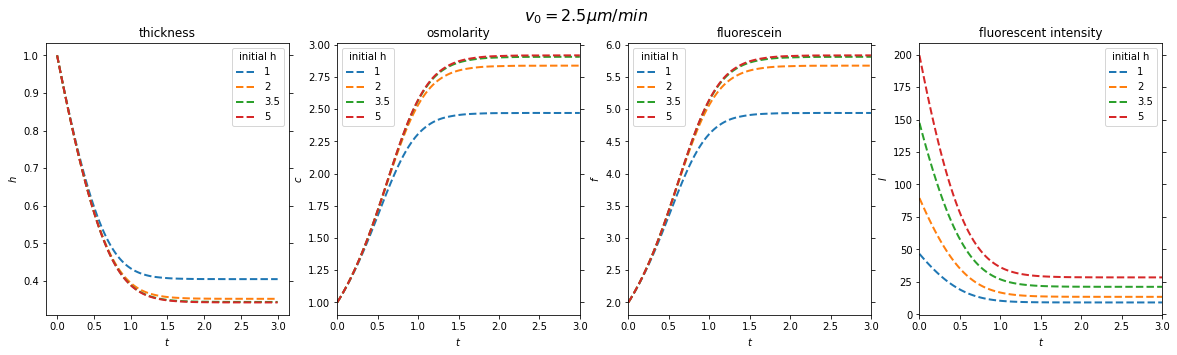

In [50]:
#@title
Pc = .52
thickness, c, f, I = solveTF(t_begin, t_end, t_nsamples, t_space, h_init, Pc, d, f0)

fig, ax = plt.subplots (1,4, figsize=(20,5))
thickness_plot(t_mat, thickness, d, ax[0])
osmolarity_plot(t_mat, c, d, ax[1])
fluorescein_plot(t_mat, f, d, ax[2])
intensity_plot(t_mat, I, d, ax[3])
fig.suptitle("$v_0=2.5\mu m/min$",fontsize=16)
plt.show()

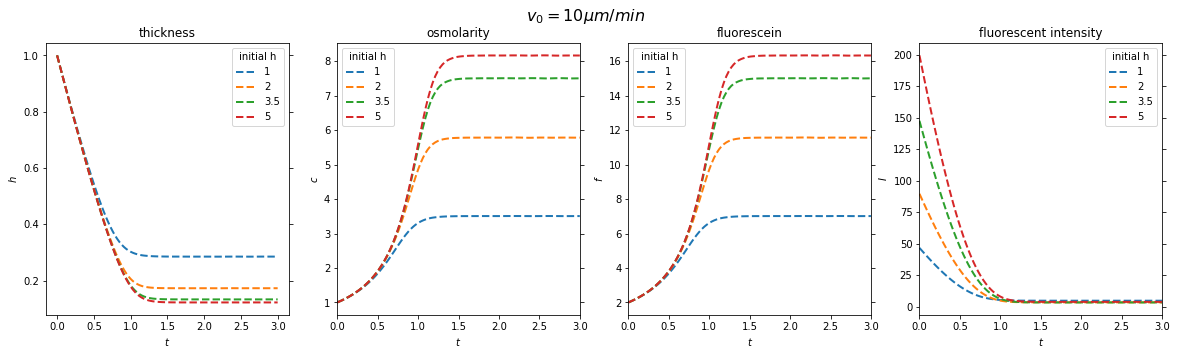

In [51]:
#@title
Pc = .13
thickness, c, f, I = solveTF(t_begin, t_end, t_nsamples, t_space, h_init, Pc, d, f0)
np.savetxt("thickness_Pc13_f2_v10.csv", thickness, delimiter=",")


fig, ax = plt.subplots (1,4, figsize=(20,5))
thickness_plot(t_mat, thickness, d, ax[0])
osmolarity_plot(t_mat, c, d, ax[1])
fluorescein_plot(t_mat, f, d, ax[2])
intensity_plot(t_mat, I, d, ax[3])
fig.suptitle("$v_0=10\mu m/min$",fontsize=16)
plt.show()

# Dynamics and Initial Fluorescein Concentration

In [70]:
#@title
## Dimensional plots in semilog scale
# Plots all solutions for thickness
def thickness_plot_dim(t_space, thickness, d, ax): 
  ax.plot(t_space.T, thickness.T, '--', linewidth=2)
  ax.set_xscale('log')
  ax.set_xticks([1,4,10,30,60])
  ax.set_xticklabels([1,4,10,30,60])
  ax.set_title('thickness')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$ (sec)')
  ax.set_ylabel('$h (\mu m)$')
  ax.set_xlim([0.5, 90])
  ax.set_ylim([0, 5])
  ax.legend(d,title='initial h')
  return;

def osmolarity_plot_dim(t_space, c, d, ax):
    ax.plot(t_space.T, c.T, '--', linewidth=2)
    ax.set_xscale('log')
    ax.set_xticks([1,4,10,30,60])
    ax.set_xticklabels([1,4,10,30,60])
    ax.set_title('osmolarity')
    ax.tick_params(bottom=True, top=False, left=True, right=True)
    ax.set_xlabel('$t$ (sec)')
    ax.set_ylabel('$c$')
    ax.set_xlim([0.25, 90])
    #plt.ylim([0, 8])
    ax.legend(d,title='initial h')
    return c;

def fluorescein_plot_dim(t_space, f, d, ax):
  ax.plot(t_space.T, f.T, '--', linewidth=2)
  ax.set_xscale('log')
  ax.set_xticks([1,4,10,30,60])
  ax.set_xticklabels([1,4,10,30,60])
  ax.set_title('fluorescein')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$ (sec)')
  ax.set_ylabel('$f$')
  ax.set_xlim([0.25, 90])
  #plt.ylim([0, 8])
  ax.legend(d,title='initial h')
  return f;

def intensity_plot_dim(t_space, I, d, ax):
  ax.plot(t_space.T, I.T, '--', linewidth=2)
  ax.set_xscale('log')
  ax.set_xticks([1,4,10,30,60])
  ax.set_xticklabels([1,4,10,30,60])
  ax.set_title('fluorescent intensity')
  ax.tick_params(bottom=True, top=False, left=True, right=True)
  ax.set_xlabel('$t$ (sec)')
  ax.set_ylabel('$I$')
  ax.set_xlim([0.25, 90])
 #plt.ylim([0, 200])
  ax.legend(d,title='initial h')
  return I;

In [71]:
#@title
# Define the problem
v0=2.5
t_begin=0
t_end=90*v0/(1*60)
print(t_end)
t_nsamples=2000
t_space = np.linspace(t_begin, t_end, t_nsamples)
d = [1, 2, 3.5, 5]
h_init = 1

#Pc = 0.39
#Pc = 0
phi = [0.0404,0.0808,0.141,0.202]
I_0 = 3000

3.75


In [75]:
#@title
Pc = 1.55
f0 = 0.01
thickness, c, f, I = solveTF(t_begin, t_end, t_nsamples, t_space, h_init, Pc, d, f0)
print(c)

[[1.         1.00184727 1.00369579 ... 1.60352435 1.60352485 1.60352538]
 [1.         1.00187304 1.00374761 ... 1.63954872 1.63954915 1.6395496 ]
 [1.         1.00187604 1.00375363 ... 1.64405841 1.64405884 1.64405928]
 [1.         1.00187649 1.00375454 ... 1.64474453 1.64474496 1.6447454 ]]


In [73]:
#@title
# dimensionalize the results
thickness_dim = np.multiply(thickness.T,d).T
time_dim=np.outer(d,t_space)*(60/2.5)

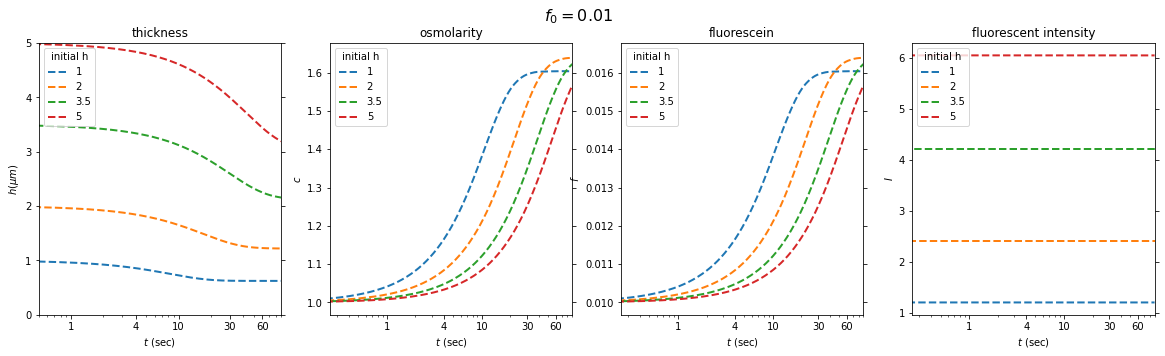

[[1.21163405 1.2116336  1.21163315 ... 1.21144371 1.21144371 1.21144371]
 [2.42277869 2.42277778 2.42277687 ... 2.42236981 2.42236981 2.4223698 ]
 [4.22659659 4.226595   4.22659341 ... 4.22587703 4.22587703 4.22587703]
 [6.05327819 6.05327592 6.05327364 ... 6.05224627 6.05224627 6.05224627]]


In [76]:
#@title
# f0 = 0.01
fig, ax = plt.subplots (1,4, figsize=(20,5))
thickness_plot_dim(time_dim, thickness_dim, d, ax[0])
c_A = osmolarity_plot_dim(time_dim, c, d, ax[1])
f_A = fluorescein_plot_dim(time_dim, f, d, ax[2])
I_A = intensity_plot_dim(time_dim, I, d,ax[3])
fig.suptitle("$f_0=$"+str(f0),fontsize=16)
plt.show()

print(I)

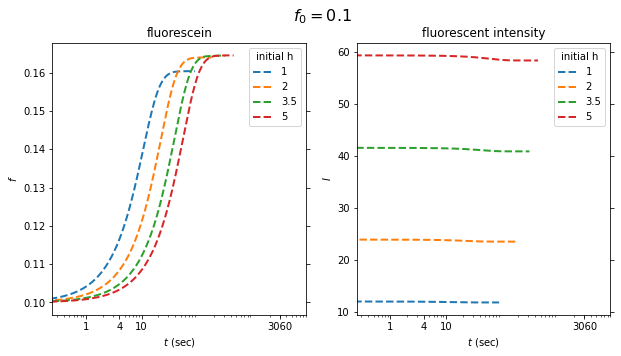

In [57]:
#@title
# recalculate f and I
f0 = 0.1
f = f0/thickness
I = intensity(thickness, phi, f0, I_0)
fig, ax = plt.subplots (1,2, figsize=(10,5))
f_B = fluorescein_plot_dim(time_dim, f, d, ax[0])
I_B = intensity_plot_dim(time_dim, I, d, ax[1])
fig.suptitle("$f_0=$"+str(f0),fontsize=16)
plt.show()

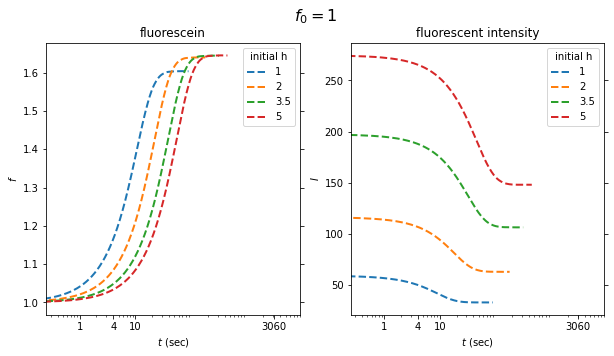

In [58]:
#@title
# recalculate f and I
f0 = 1
f = f0/thickness
I = intensity(thickness, phi, f0, I_0)
fig, ax = plt.subplots (1,2, figsize=(10,5))
f_C = fluorescein_plot_dim(time_dim, f, d, ax[0])
I_C = intensity_plot_dim(time_dim, I, d, ax[1])
fig.suptitle("$f_0=$"+str(f0),fontsize=16)
plt.show()

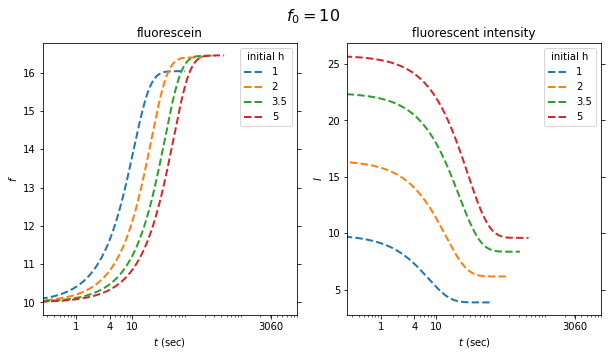

In [59]:
#@title
# recalculate f and I
f0 = 10
f = f0/thickness
I = intensity(thickness, phi, f0, I_0)
fig, ax = plt.subplots (1,2, figsize=(10,5))
f_D = fluorescein_plot_dim(time_dim, f, d, ax[0])
I_D = intensity_plot_dim(time_dim, I, d, ax[1])
fig.suptitle("$f_0=$"+str(f0),fontsize=16)
plt.show()

## Fluorescence Intensity During Thinning

In [60]:
# Pc = 0 will give steady state
Pc = 0
f0 = 0.01 # first fl value; others calculated later
thickness, c, f, I = solveTF(t_begin, t_end, t_nsamples, t_space, h_init, Pc, d, f0)

# dimensionalize the results
thickness_dim = np.multiply(thickness.T,d).T
time_dim=np.outer(d,t_space)*(60/2.5)

In [61]:
# get minimum thickness value for each fluorescein value when d=3.5
print(thickness[:,-1])
print(thickness_dim[:,-1])
h_end = thickness_dim[3,-1]
print(h_end)
print(h_init)

[0.25006094 0.12501312 0.07145665 0.05002494]
[0.25006094 0.25002624 0.25009828 0.25012469]
0.2501246865175075
1


In [62]:
#calculate fluorescein and intensity values for h=3.5
f_list = [.01, .1, 1, 10]
fluorescein = np.empty((len(f_list),len(t_space)))
fl_intensity = np.empty((len(f_list),len(t_space)))
for i in range(len(f_list)):
  fluorescein[i,:] = np.divide(f_list[i],thickness[2,:])
  fl_I = intensity(thickness, phi, f_list[i], I_0)
  fl_intensity[i,:] = fl_I[2,:]

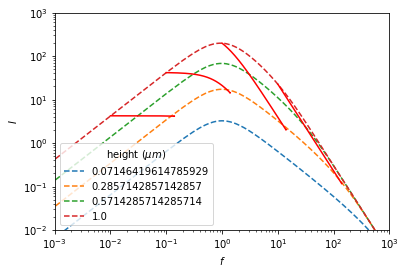

In [63]:
# create plot with constant h values and fl v I for d=3.5
def intensity_const_h2(h, f, phi, I_0, f_A, I_A):
  I = np.empty((len(h),len(f)))
  for i in range(len(h)):
    I[i,:] = I_0*(1-np.exp(-phi[i]*f*h[i]))/(1+np.square(f))

  f1 = np.tile(f,(len(h),1)) # create matrix of f values to use in plotting
  plt.figure(2)
  plt.loglog(f1.T,I.T,'--')
  plt.loglog(f_A,I_A,'r-')
  plt.xlim([0.001, 1000])
  plt.ylim([0.01, 1000])
  plt.xlabel('$f$')
  plt.ylabel('$I$')
  plt.legend(h,title='height ($\mu m$)')

h = np.divide([h_end, 1, 2, 3.5],3.5)  # constant h values, nondimensionalized
f = np.linspace(0.0001,1000,10000)
phi_const_h = [0.0303,0.0404,0.0808,0.141] # approximate what phi would be when h=h_end

intensity_const_h2(h, f, phi_const_h, I_0,fluorescein.T,fl_intensity.T)

In [64]:
print(np.divide(h,3.5))

[0.02041834 0.08163265 0.16326531 0.28571429]


In [64]:
result = minimize(objective, pt, args = (a,), method='nelder-mead')